# MNIST CNN Project - Loading Model and Testing Number Image

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import numpy as np
import sys
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### 세션 열기

In [3]:
sess = tf.InteractiveSession()

#### 모델 불러오기

In [4]:
new_saver = tf.train.import_meta_graph('./mnist_cnn.ckpt.meta')
new_saver.restore(sess, './mnist_cnn.ckpt')

INFO:tensorflow:Restoring parameters from ./mnist_cnn.ckpt


#### Tensor 그래프 불러오기

- 모델 저장 시 그래프 정보가 포함되어 있으므로, 데이터 테스트에 사용할 텐서 그래프만 불러오면 된다.

In [5]:
X = sess.graph.get_tensor_by_name("model3/Placeholder_1:0")
logits = sess.graph.get_tensor_by_name("model3/dense_3/BiasAdd:0")
training = sess.graph.get_tensor_by_name("model3/Placeholder:0")

#### 이미지 파일 테스트

- 한번에 확인하기

MNIST predicted Number
[array([9]), array([1]), array([1]), array([8]), array([3]), array([5]), array([1]), array([8]), array([1])]


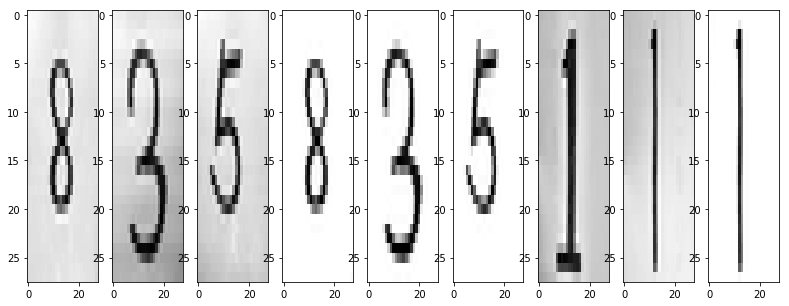

In [43]:
result_show = []
fig = plt.figure(figsize=(15,5))
for i in range(0, 9):
    im=Image.open("./Number_data/number_{}.jpeg".format(i+1))
    img = np.array(im.resize((28, 28), Image.ANTIALIAS).convert("L"))
    data = img.reshape([1, 784])
    data = 1-(data/255)
    ax = fig.add_subplot(1,10,i+1)
    ax.imshow(img.reshape(28, 28), cmap='gray', interpolation='nearest', aspect='auto')
    
    result = sess.run(logits, feed_dict={X:data, training:False})
    result_show.append(sess.run(tf.argmax(result, 1)))
print("MNIST predicted Number")
print(result_show)   

- 이미지 하나씩 확인

MNIST predicted Number :  [3]


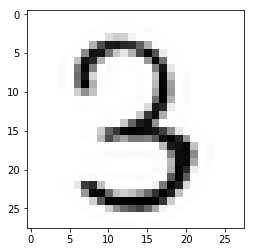

In [73]:
im=Image.open("./Number_data/number_5.jpeg")
img = np.array(im.resize((28, 28), Image.ANTIALIAS).convert("L"))
data = img.reshape([1, 784])
data = 1-(data/255)
plt.imshow(img.reshape(28, 28), cmap='gray', interpolation='nearest')
result = sess.run(logits, feed_dict={X:data, training:False})
print("MNIST predicted Number : ", sess.run(tf.argmax(result, 1)))

- 이미지 명암 조절 후 숫자 인식

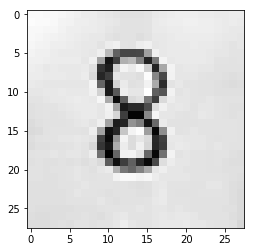

In [81]:
im=Image.open("./Number_data/number_1.jpeg")
im_light = Image.eval(im, lambda x:x+80)
plt.imshow(im_light)
img = np.array(im_light.resize((28, 28), Image.ANTIALIAS).convert("L"))
data = img.reshape([1, 784])
data = 1-(data/255)
plt.imshow(img.reshape(28, 28), cmap='gray', interpolation='nearest')

In [82]:
result = sess.run(logits, feed_dict={X:data, training:False})
print("MNIST predicted Number : ", sess.run(tf.argmax(result, 1)))

MNIST predicted Number :  [8]


#### MNIST 데이터 테스트

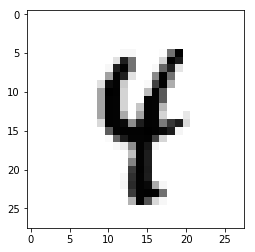

In [56]:
image_b = mnist.validation.images[np.random.randint(0, len(mnist.validation.images))]
plt.imshow(image_b.reshape([28, 28]), cmap='Greys')

In [57]:
image_b = image_b.reshape([1, 784])
result = sess.run(logits, feed_dict={X:image_b, training:False})
print("MNIST predicted Number : ", sess.run(tf.argmax(result, 1)))

MNIST predicted Number :  [4]


#### HTML 숫자 그림 테스트

In [206]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

In [207]:
javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;


    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

In [208]:
from IPython.display import HTML
HTML(input_form + javascript)

In [60]:
result = sess.run(logits, feed_dict={X:[image], training:False})
print("MNIST predicted Number : ", sess.run(tf.argmax(result, 1)))

MNIST predicted Number :  [0]


### Reference

- [모두의 딥러닝](https://www.youtube.com/watch?v=c62uTWdhhMw&feature=youtu.be)
- [조대협의 블로그](http://bcho.tistory.com/1157?category=555440)
- [kylog's blog](http://kylog.tistory.com/18)